In [30]:
#Import all the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
#Read the data from the provided link
url = "https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [32]:
#Understand the data by reading first 5 and last 5 records from the dataset
print(data.head())
print(data.tail())
print(data.shape)
print(data.isnull().sum())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
(25, 2)
Hours     0
Scores    0
dtype: int64


In [33]:
#Display the summary of the dataset
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


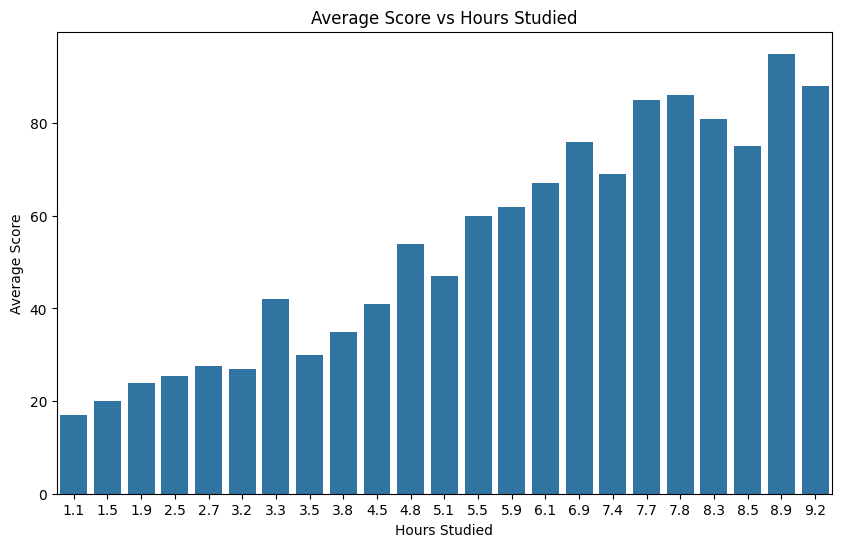

In [34]:
"""Group the data using score and hours, then Using bar chart ,plot score vs hours. The
next phase is to enter distribution scores and plot them according to the requirement,
here we are going to enter the title, x_label, and y_label, and show it according to the
desired result."""

grouped_data = data.groupby('Hours').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hours', y='Scores', data=grouped_data)
plt.title('Average Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Average Score')
plt.show()

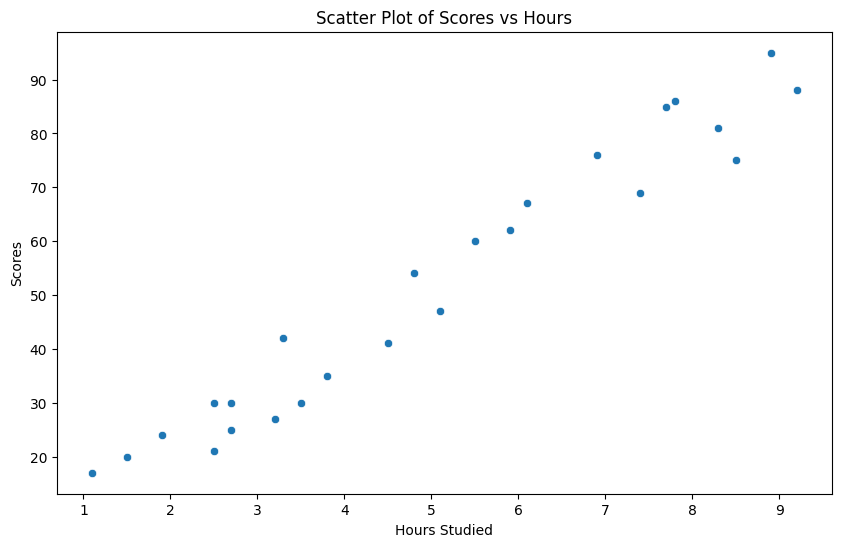

In [35]:
#Visualize distribution of data using scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Scatter Plot of Scores vs Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [36]:
#Prepare the data by splitting it into Training and Test set

X = data[['Hours']]
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

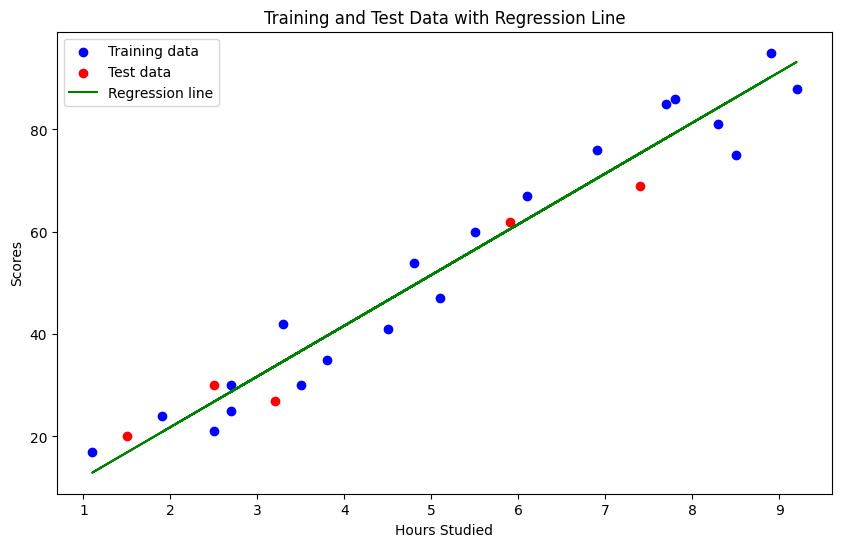

In [37]:
#Plot the regression line

model = LinearRegression()
model.fit(X_train, y_train)

#Plot the training and test data . Predict the score and compare predicted and actual score

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, model.predict(X_train), color='green', label='Regression line')
plt.title('Training and Test Data with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test)

# Predict accuracy using r2square
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.9454906892105354


In [39]:
#Predict the percentage grade of a student if study hours are 9.25

hours = np.array([[9.25]])
predicted_score = model.predict(hours)
print(f'Predicted score for 9.25 hours: {predicted_score[0]}')

Predicted score for 9.25 hours: 93.69173248737539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
#Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


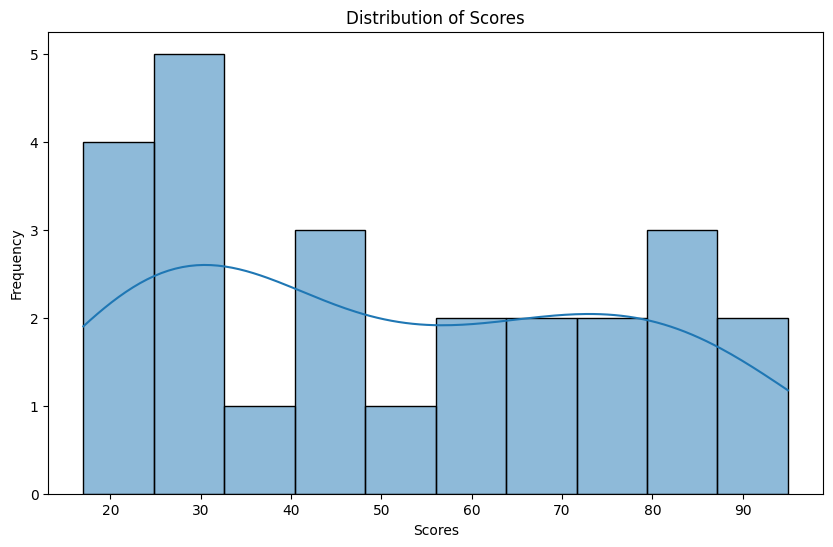

In [41]:
#Import seaborn and plot the distribution as well

plt.figure(figsize=(10, 6))
sns.histplot(data['Scores'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

In [42]:
#Print actual vs predicted percentage score
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

    Actual  Predicted
5       20  16.884145
2       27  33.732261
19      69  75.357018
16      30  26.794801
11      62  60.491033


In [43]:
#Apply ridge and grid search to improvise your model

from sklearn.model_selection import GridSearchCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

# Calculate R² score for Ridge
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge R² Score: {ridge_r2}')

# Compare predictions
ridge_comparison = pd.DataFrame({'Actual': y_test, 'Ridge Predicted': ridge_pred})
print(ridge_comparison)

Ridge R² Score: 0.9469535028586806
    Actual  Ridge Predicted
5       20        17.181700
2       27        33.894564
19      69        75.185168
16      30        27.012796
11      62        60.438524


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
